<a href="https://colab.research.google.com/github/DevilNReality/Vaccine-Usage-Prediction-/blob/main/Code%20File/%20Vaccine_Usage_Prediction_Imarticus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach To The Problem

1. Load the data and the libraries
2. Data preparation and data preprocessing
3. Data Visualization
4. Data Analysis
  1. Uni-Variate Analysis
  2. Bi-Variate Analysis(Correlation & Chi-Squared)
  3. Multi-Variate
     1. Supervised
       1. Classification(Y is dependant)
       2. Regression(Y is continuous)
     2. Unsupervised
       1. Clustering
       2. Dimensionality Reduction
5. Encoding
6. Splitting Of Data
7. Decision Tree
8. Random Forest
9. Evaluation on Test Dataset

# Libraries and Dataset

In [ ]:
!pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from dataprep.eda import create_report
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/h1n1_vaccine_prediction.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
dataset.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

# Exploratory Data Analysis

In [ ]:
dataset.describe()

unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count  26707.000000  26615.000000    26591.000000          26636.000000   
mean   13353.000000      1.618486        1.262532              0.048844   
std     7709.791156      0.910311        0.618149              0.215545   
min        0.000000      0.000000        0.000000              0.000000   
25%     6676.500000      1.000000        1.000000              0.000000   
50%    13353.000000      2.000000        1.000000              0.000000   
75%    20029.500000      2.000000        2.000000              0.000000   
max    26706.000000      3.000000        2.000000              1.000000   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
count       26499.000000      26688.000000           26665.000000   
mean            0.725612          0.068982               0.825614   
std             0.446214          0.253429               0.379448   
min             0.000000          0.000000               0.000000   
25%             0.000000          0.000000               1.000000   
50%             1.000000          0.000000               1.000000   
75%             1.000000          0.000000               1.000000   
max             1.000000          1.000000               1.000000   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count             26620.00000               26625.000000      26579.000000   
mean                  0.35864                   0.337315          0.677264   
std                   0.47961                   0.472802          0.467531   
min                   0.00000                   0.000000          0.000000   
25%                   0.00000                   0.000000          0.000000   
50%                   0.00000                   0.000000          1.000000   
75%                   1.00000                   1.000000          1.000000   
max                   1.00000                   1.000000          1.000000   

       ...  has_health_insur  is_h1n1_vacc_effective  is_h1n1_risky  \
count  ...       14433.00000            26316.000000   26319.000000   
mean   ...           0.87972                3.850623       2.342566   
std    ...           0.32530                1.007436       1.285539   
min    ...           0.00000                1.000000       1.000000   
25%    ...           1.00000                3.000000       1.000000   
50%    ...           1.00000                4.000000       2.000000   
75%    ...           1.00000                5.000000       4.000000   
max    ...           1.00000                5.000000       5.000000   

       sick_from_h1n1_vacc  is_seas_vacc_effective  is_seas_risky  \
count         26312.000000            26245.000000   26193.000000   
mean              2.357670                4.025986       2.719162   
std               1.362766                1.086565       1.385055   
min               1.000000                1.000000       1.000000   
25%               1.000000                4.000000       2.000000   
50%               2.000000                4.000000       2.000000   
75%               4.000000                5.000000       4.000000   
max               5.000000                5.000000       5.000000   

       sick_from_seas_vacc  no_of_adults  no_of_children  h1n1_vaccine  
count         26170.000000  26458.000000    26458.000000  26707.000000  
mean              2.118112      0.886499        0.534583      0.212454  
std               1.332950      0.753422        0.928173      0.409052  
min               1.000000      0.000000        0.000000      0.000000  
25%               1.000000      0.000000        0.000000      0.000000  
50%               2.000000      1.000000        0.000000      0.000000  
75%               4.000000      1.000000        1.000000      0.000000  
max               5.000000      3.000000        3.000000      1.000000  

[8 rows x 25 columns]

## Uni Variate Analysis

In [ ]:
dataset.skew()

unique_id                    0.000000
h1n1_worry                  -0.159913
h1n1_awareness              -0.239224
antiviral_medication         4.186503
contact_avoidance           -1.011306
bought_face_mask             3.401744
wash_hands_frequently       -1.716380
avoid_large_gatherings       0.589522
reduced_outside_home_cont    0.688227
avoid_touch_face            -0.758355
dr_recc_h1n1_vacc            1.349742
dr_recc_seasonal_vacc        0.724397
chronic_medic_condition      0.962097
cont_child_undr_6_mnths      3.033008
is_health_worker             2.462087
has_health_insur            -2.334909
is_h1n1_vacc_effective      -0.902706
is_h1n1_risky                0.672957
sick_from_h1n1_vacc          0.651281
is_seas_vacc_effective      -1.315177
is_seas_risky                0.250923
sick_from_seas_vacc          0.919587
no_of_adults                 0.786572
no_of_children               1.543903
h1n1_vaccine                 1.406022
dtype: float64

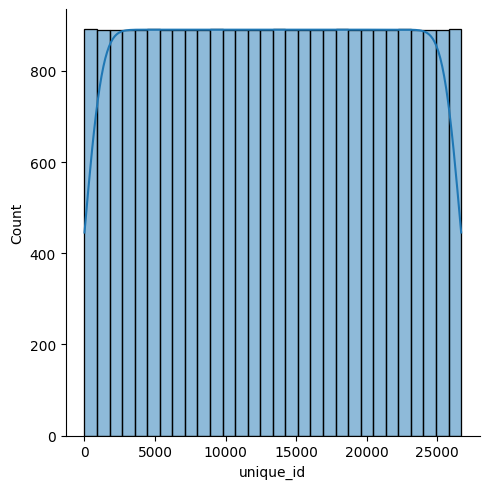

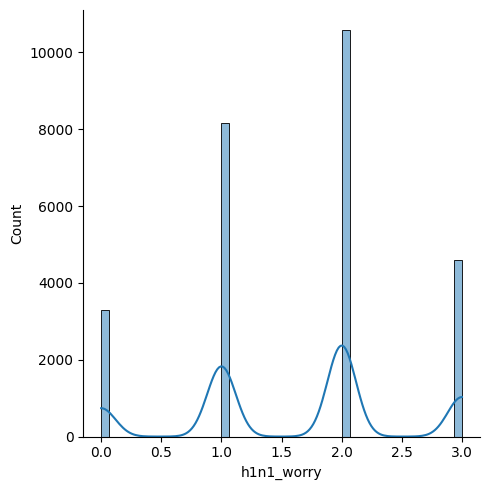

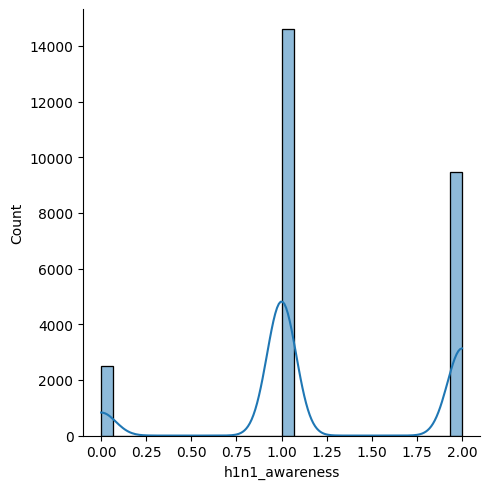

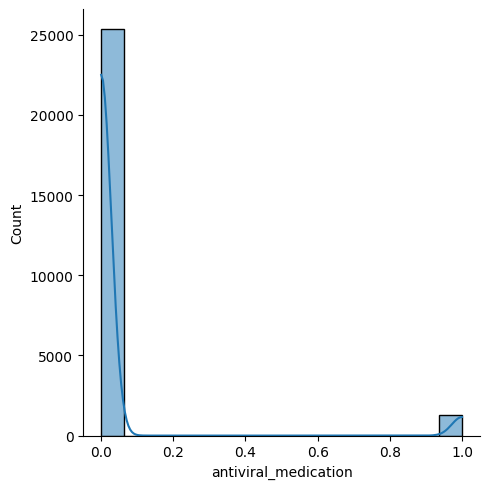

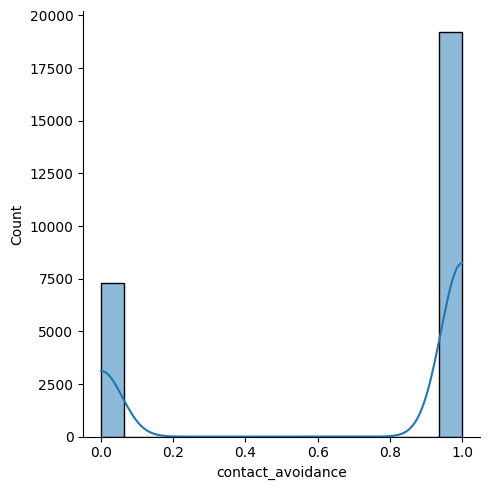

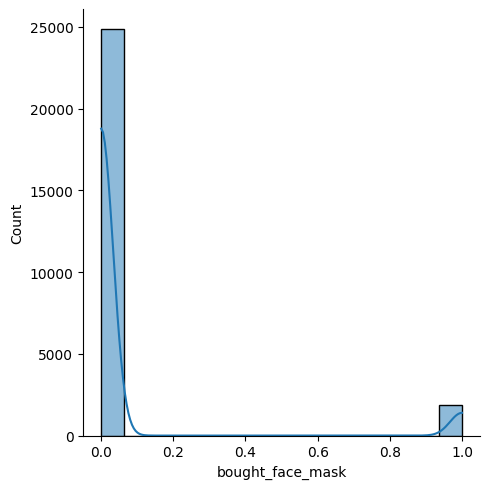

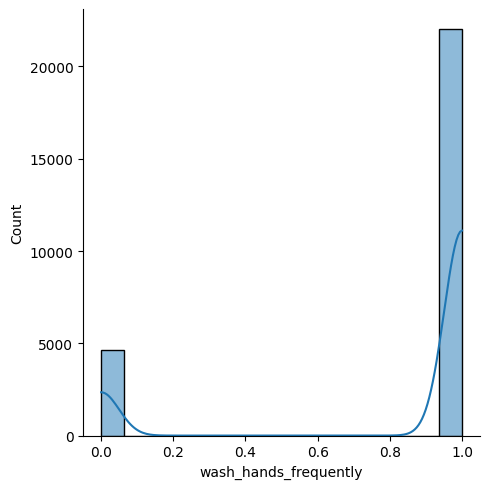

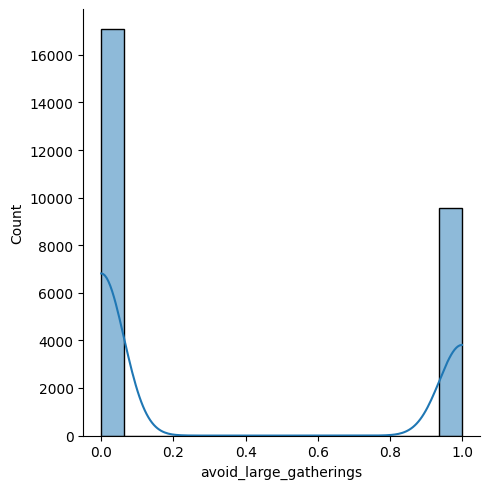

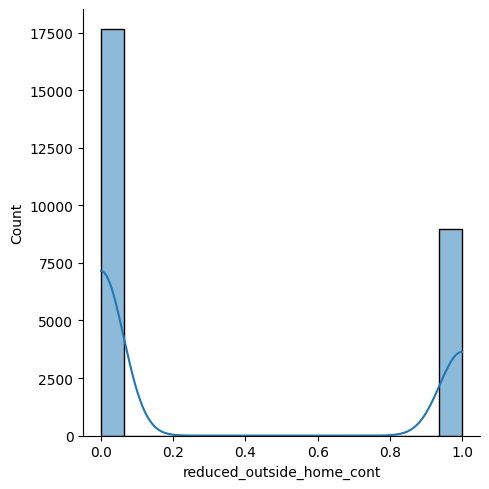

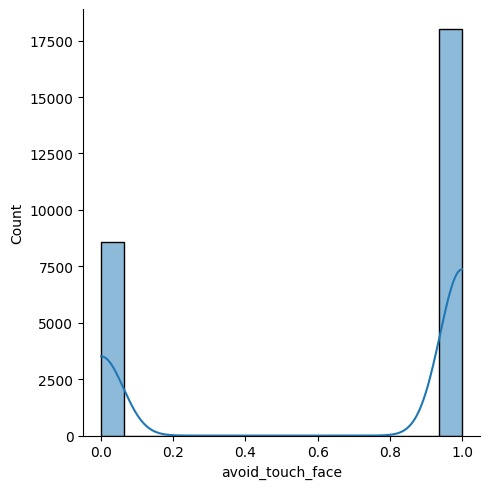

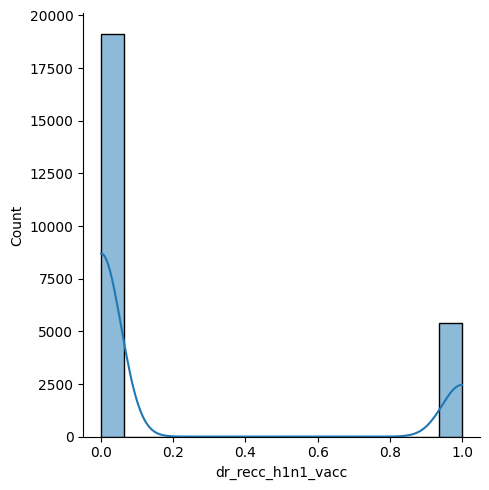

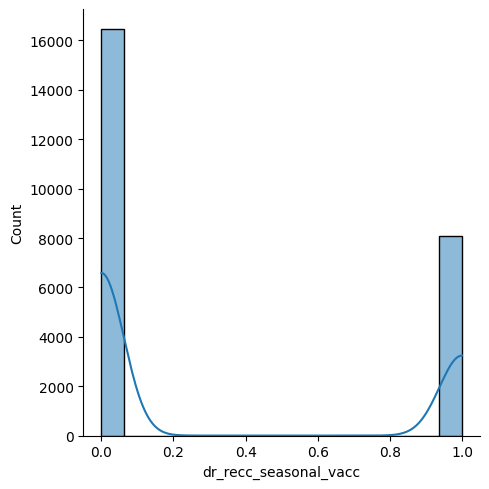

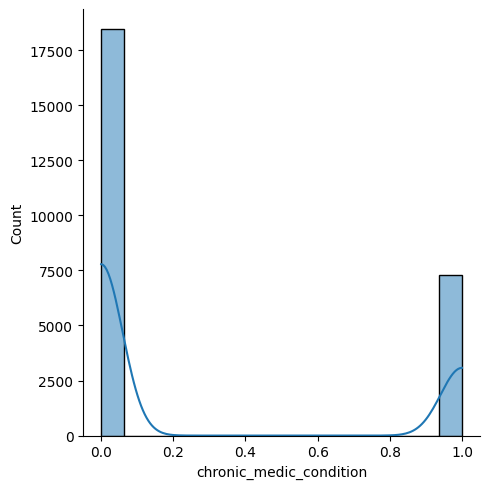

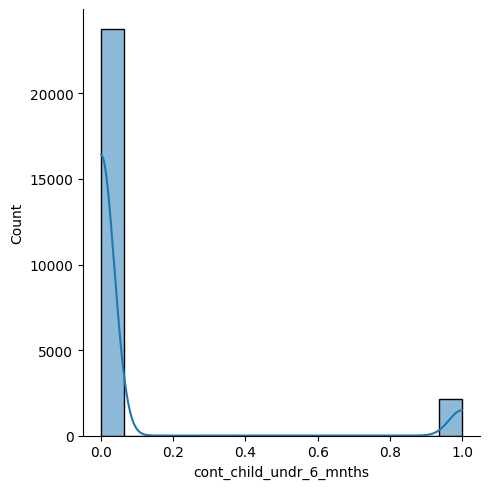

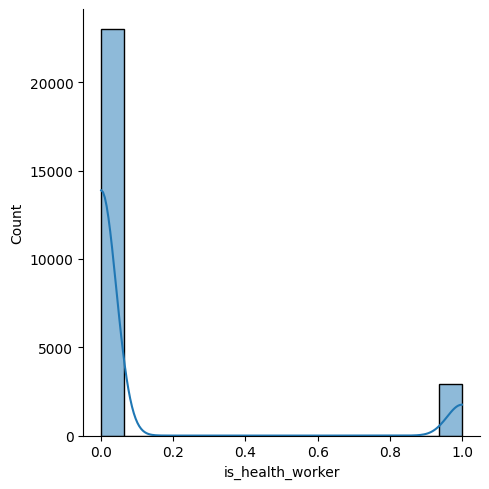

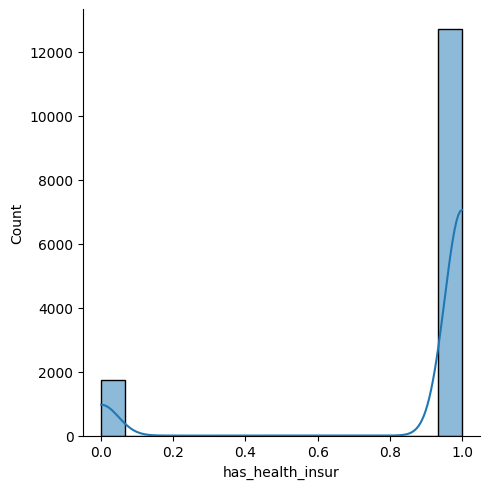

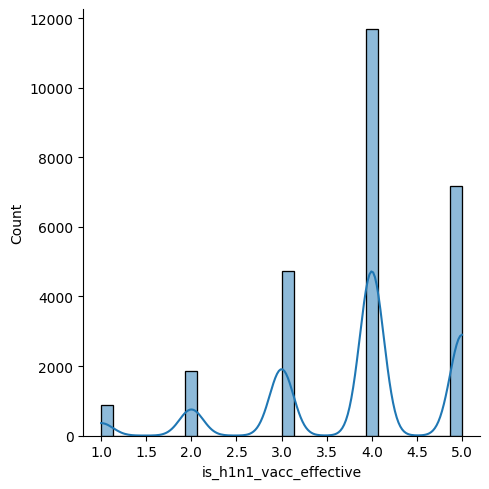

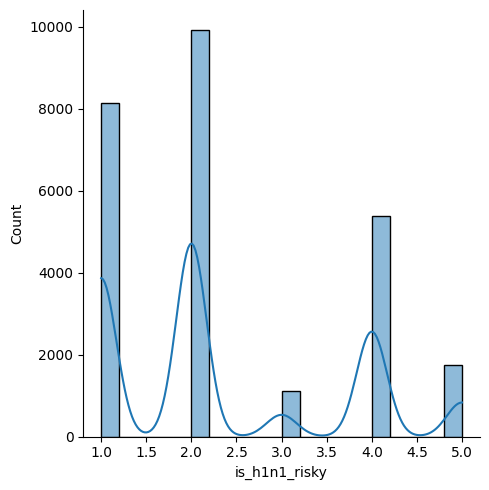

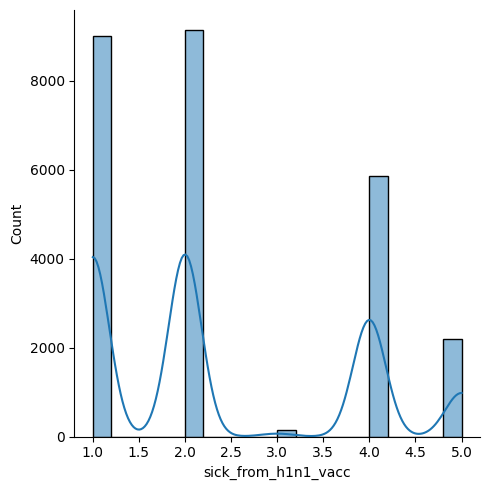

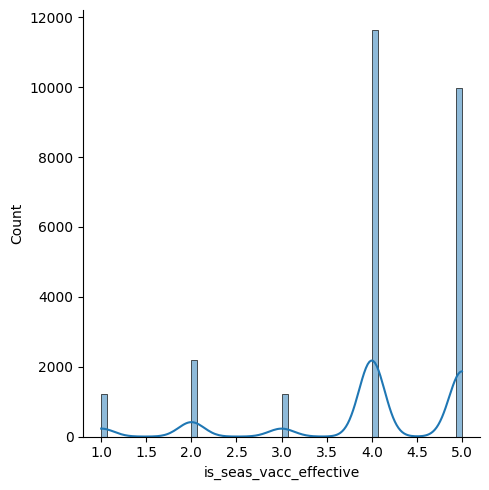

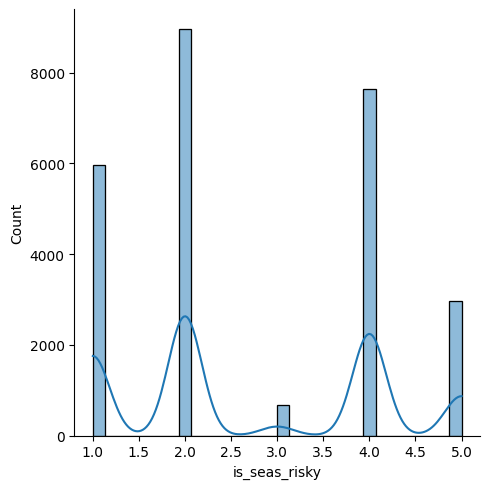

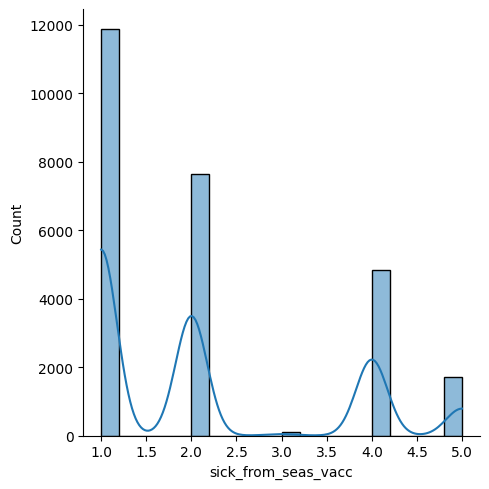

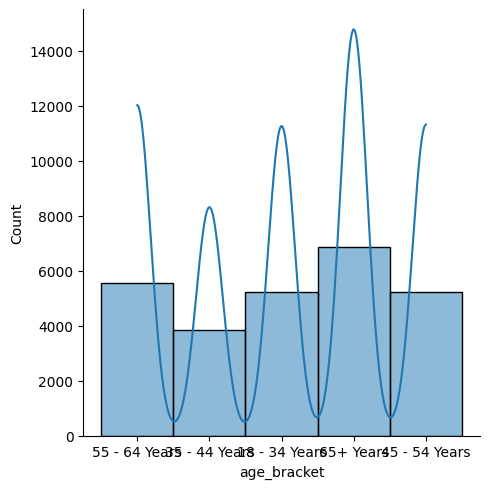

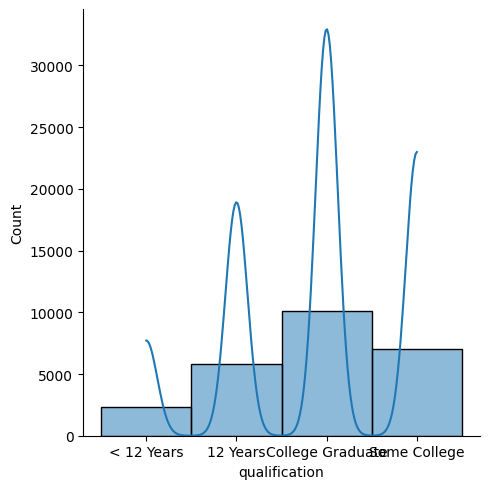

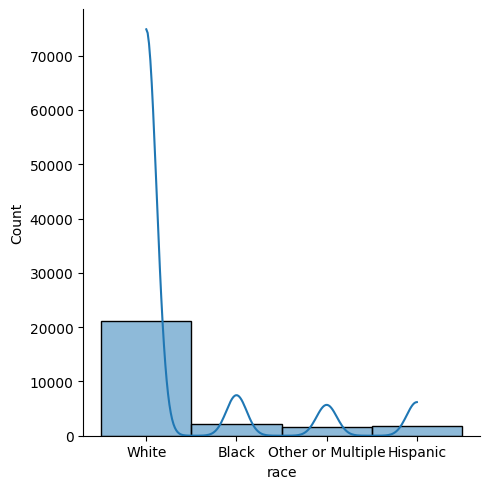

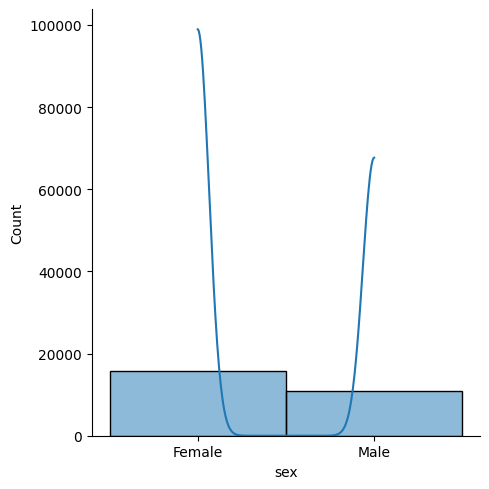

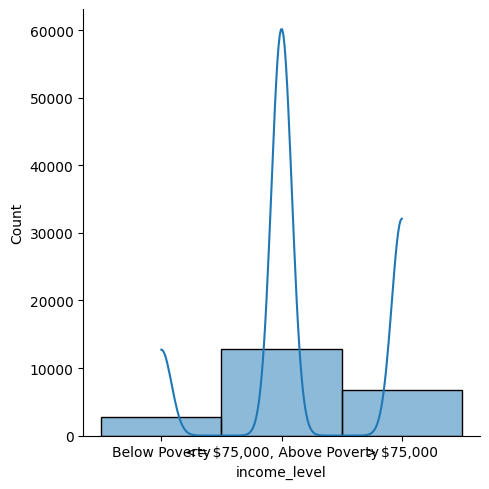

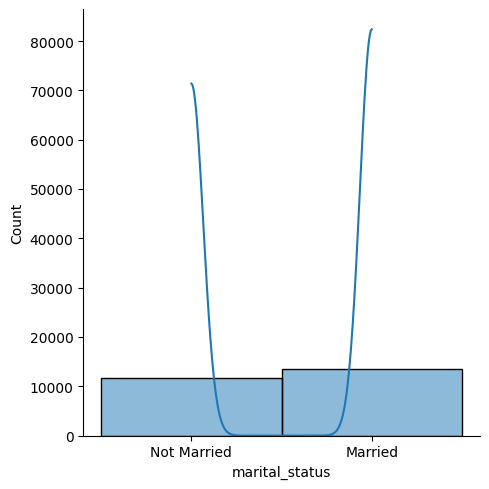

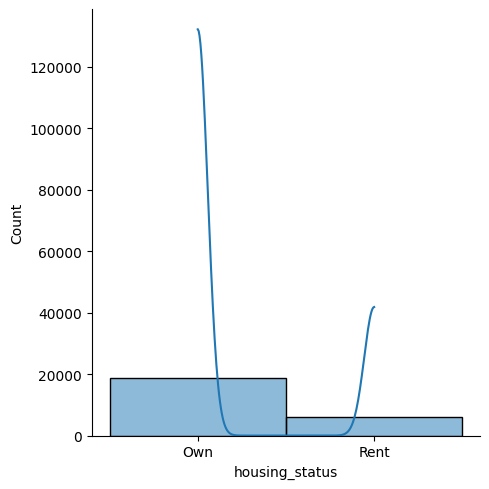

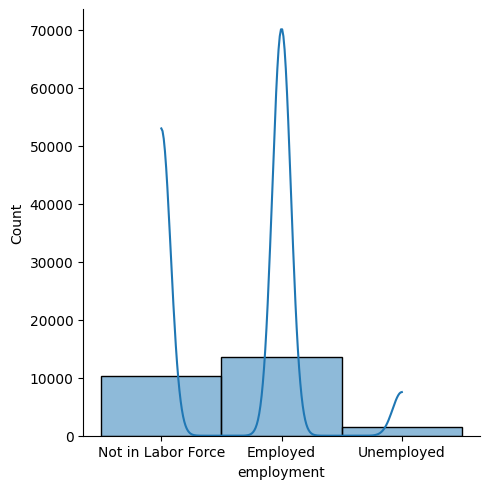

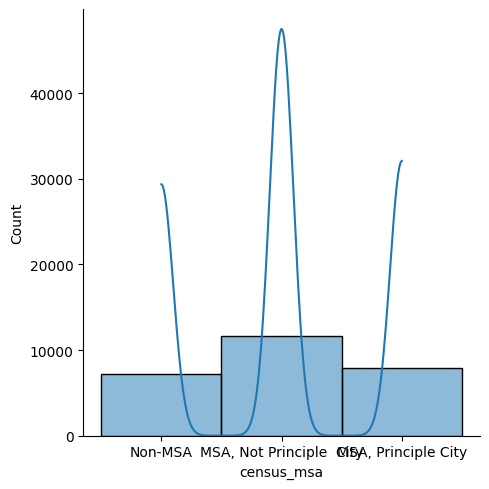

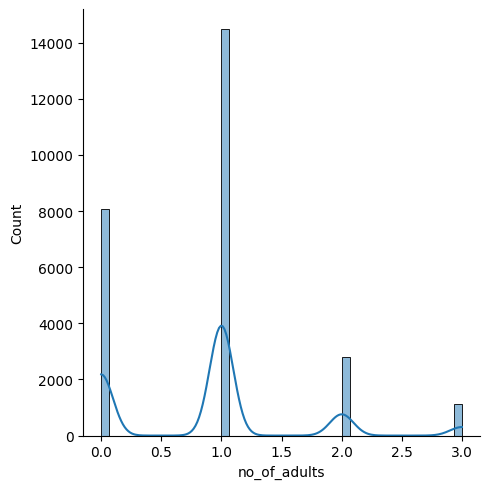

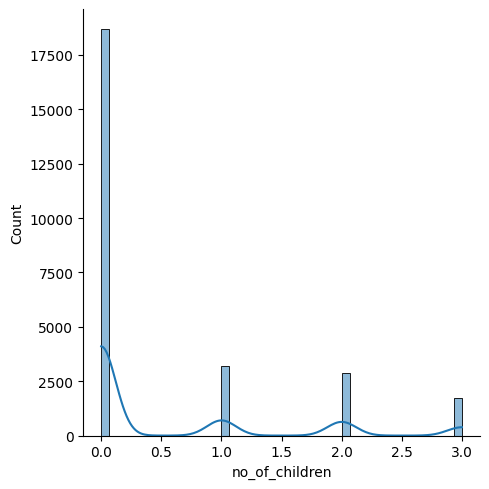

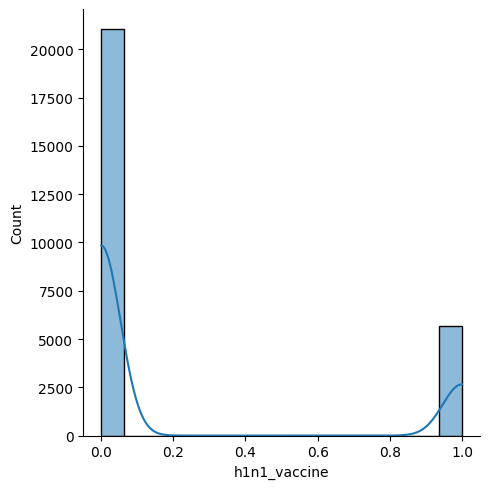

In [ ]:
for i in dataset.columns:
  sns.displot(dataset[i] , kde = True)

## Bi-Variate Analysis

<Axes: >

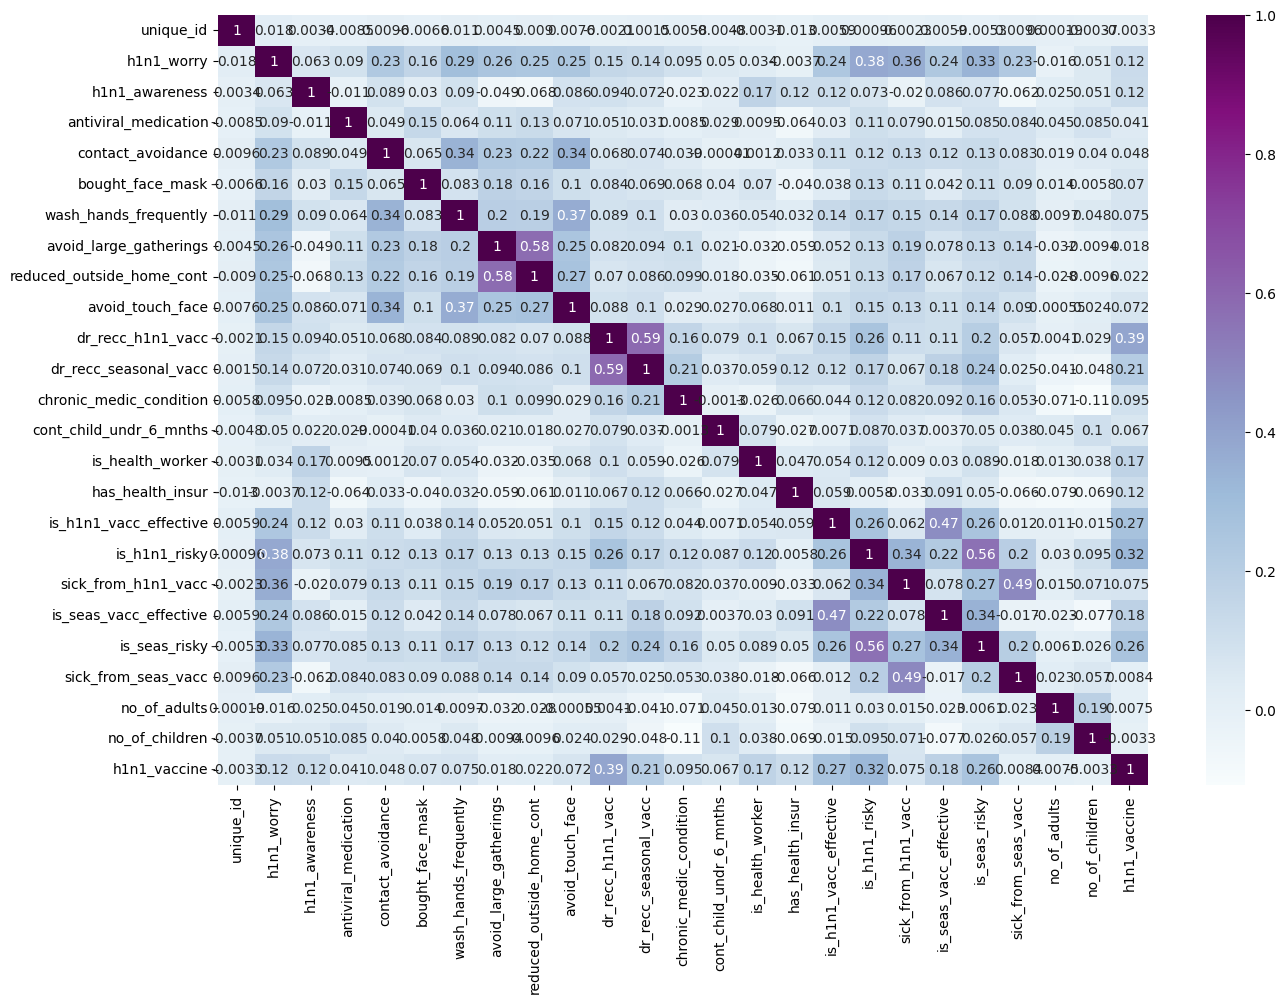

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(dataset.corr(), annot = True , cmap = 'BuPu')

DataPrep Report
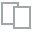
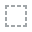
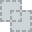
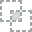
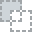
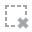
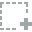
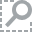
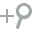
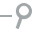
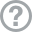
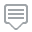
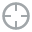
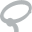
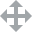
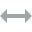
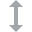
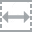
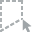
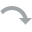
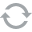
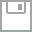
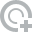
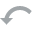
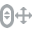
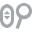
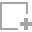
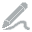
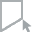
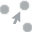
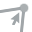
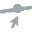

In [ ]:
create_report(dataset)

# Data Preparation

In [ ]:
def data_prep(dataset):
  # Dropping index column and highest missing values column
  dataset.drop(['unique_id'] , axis = 1 , inplace = True)
  dataset.drop(['has_health_insur'] , axis = 1 , inplace = True)

  # Handling missing values
  for i in dataset.columns:
    if dataset[i].dtype == object:
      dataset[i] = np.where(dataset[i].isna(), dataset[i].mode(dropna=True)[0], dataset[i])
    else:
      dataset[i] = np.where(dataset[i].isna(), dataset[i].median(skipna=True), dataset[i])

  # Changing Data Type to int
  for i in dataset.columns:
    if dataset[i].dtype == float:
      dataset[i] = dataset[i].astype('int')
    else:
      continue

In [ ]:
data_prep(dataset)

In [ ]:
dataset.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

# Label Encoding

In [ ]:
label_encoder = LabelEncoder()
for i in dataset.columns:
  if dataset[i].dtype == object:
    dataset[i] = label_encoder.fit_transform(dataset[i])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   h1n1_worry                 26707 non-null  int64
 1   h1n1_awareness             26707 non-null  int64
 2   antiviral_medication       26707 non-null  int64
 3   contact_avoidance          26707 non-null  int64
 4   bought_face_mask           26707 non-null  int64
 5   wash_hands_frequently      26707 non-null  int64
 6   avoid_large_gatherings     26707 non-null  int64
 7   reduced_outside_home_cont  26707 non-null  int64
 8   avoid_touch_face           26707 non-null  int64
 9   dr_recc_h1n1_vacc          26707 non-null  int64
 10  dr_recc_seasonal_vacc      26707 non-null  int64
 11  chronic_medic_condition    26707 non-null  int64
 12  cont_child_undr_6_mnths    26707 non-null  int64
 13  is_health_worker           26707 non-null  int64
 14  is_h1n1_vacc_effective

# SMOTE Balancing

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x = dataset.drop(['h1n1_vaccine'] , axis = 1)
y = dataset['h1n1_vaccine']

In [ ]:
smote = SMOTE()
x_resampled , y_resampled = smote.fit_resample(x , y)

# Spiltting of Dataset

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_resampled , y_resampled , test_size = 0.2 , random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33652, 31)
(8414, 31)
(33652,)
(8414,)


# Model Evaluation Function

In [ ]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [ ]:
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_lr)

The Accuracy of the model is:  0.76
[[13101  3767]
 [ 4304 12480]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     16868
           1       0.77      0.74      0.76     16784

    accuracy                           0.76     33652
   macro avg       0.76      0.76      0.76     33652
weighted avg       0.76      0.76      0.76     33652



In [ ]:
model_eval(y_test , y_hat_test_lr)

The Accuracy of the model is:  0.76
[[3234  931]
 [1118 3131]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4165
           1       0.77      0.74      0.75      4249

    accuracy                           0.76      8414
   macro avg       0.76      0.76      0.76      8414
weighted avg       0.76      0.76      0.76      8414



# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 5 )
dtree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_dtree)

The Accuracy of the model is:  0.73
[[13262  3606]
 [ 5521 11263]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     16868
           1       0.76      0.67      0.71     16784

    accuracy                           0.73     33652
   macro avg       0.73      0.73      0.73     33652
weighted avg       0.73      0.73      0.73     33652



In [ ]:
model_eval(y_test , y_hat_test_dtree)

The Accuracy of the model is:  0.72
[[3296  869]
 [1468 2781]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4165
           1       0.76      0.65      0.70      4249

    accuracy                           0.72      8414
   macro avg       0.73      0.72      0.72      8414
weighted avg       0.73      0.72      0.72      8414



# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train , y_train)

The Accuracy of the model is:  1.0
[[16868     0]
 [    0 16784]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16868
           1       1.00      1.00      1.00     16784

    accuracy                           1.00     33652
   macro avg       1.00      1.00      1.00     33652
weighted avg       1.00      1.00      1.00     33652



In [ ]:
model_eval(y_test , y_hat_test_rf)

The Accuracy of the model is:  0.86
[[3568  597]
 [ 565 3684]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4165
           1       0.86      0.87      0.86      4249

    accuracy                           0.86      8414
   macro avg       0.86      0.86      0.86      8414
weighted avg       0.86      0.86      0.86      8414

